In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import seaborn as sns
import numpy as np
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import r2_score

In [2]:
## import csv file
df = pd.read_csv('caudal_extra.csv', index_col = 'fecha', parse_dates = True)
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
fecha,,,,,,,,,,,,,,,
1960-01-06 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN
1960-03-27 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN
1960-05-07 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN
1960-06-30 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN
1960-07-22 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN


disclaimer: **omiti las tildes de manera intencional**

Variables:<br>
codigo_estacion: codigo de la estacion de medicion de caudal<br>
nombre: nombre del lugar en la cuenca donde esta la estacion<br>
fecha: dia de la medicion<br>
caudal: medicion de caudal de ese dia<br>
gauge_id: id de la cuenca<br>
precip_promedio: precipitacion promedio de ese dia en la cuenca<br>
temp_max_promedio: temp maxima promedio de ese dia en la cuenca



In [3]:
df

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
fecha,,,,,,,,,,,,,,,
1960-01-06 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,0.812,4540001,Rio Grande En Paloma 1,0.000000,NaN
1960-03-27 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,0.236,4540001,Rio Grande En Paloma 1,0.000000,NaN
1960-05-07 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,0.730,4540001,Rio Grande En Paloma 1,0.000000,NaN
1960-06-30 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,3.590,4540001,Rio Grande En Paloma 1,0.000000,NaN
1960-07-22 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1.370,4540001,Rio Grande En Paloma 1,0.000000,NaN
1960-07-27 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,0.822,4540001,Rio Grande En Paloma 1,0.000000,NaN
1960-09-16 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,0.910,4540001,Rio Grande En Paloma 1,0.000000,NaN
1960-10-31 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,2.070,4540001,Rio Grande En Paloma 1,0.000000,NaN
1960-11-26 00:00:00+00:00,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,4.410,4540001,Rio Grande En Paloma 1,0.000000,NaN


# Parte 1

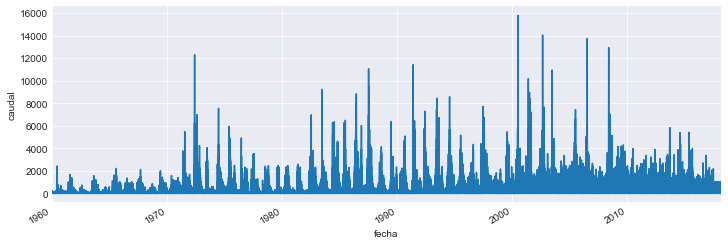

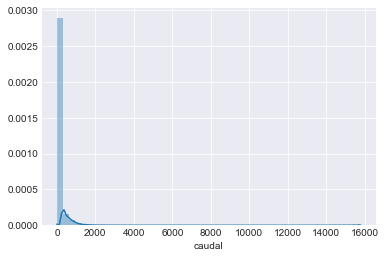

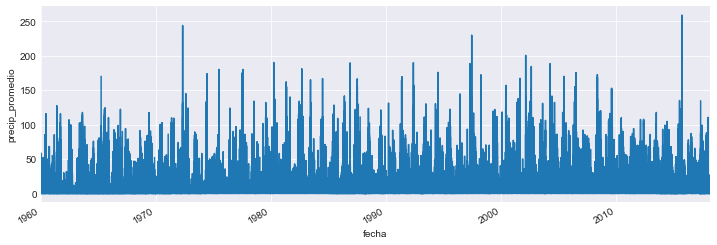

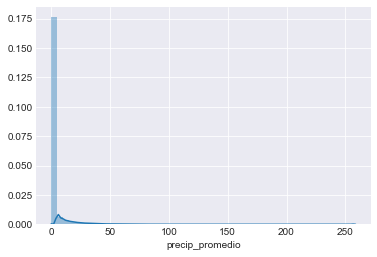

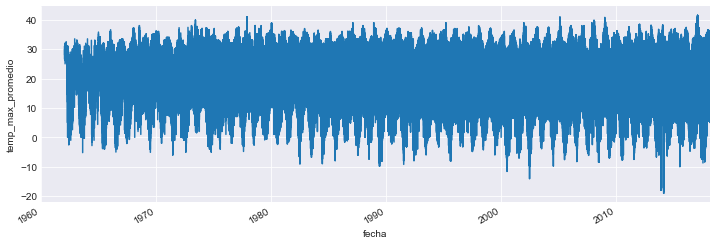

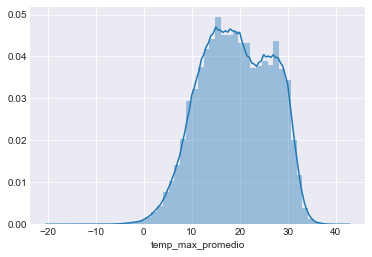

In [4]:
## time series and ppbb distr
variables_to_plot = ['caudal', 'precip_promedio', 'temp_max_promedio']
for var in variables_to_plot:
    fig, ax = plt.subplots(figsize = (12,4))
    ax.set_ylabel(var)
    df.loc[:, var].plot(ax = ax)
    fig, ax = plt.subplots(figsize = (6,4))
    sns.distplot(df.loc[:, var].dropna(axis = 0), ax = ax)

In [5]:
print('N nans caudal: {}'.format(len(df[np.isnan(df.caudal)])))
print('N nans temp: {}'.format(len(df[np.isnan(df.temp_max_promedio)])))
print('N nans precip: {}'.format(len(df[np.isnan(df.precip_promedio)])))

N nans caudal: 0
N nans temp: 151563
N nans precip: 27767


In [6]:
## Nans por estacion
df_nan = pd.DataFrame(index = df.gauge_name.unique(), columns = ['temp_max_promedio', 'precip_promedio'])

In [7]:
temp_nan, precip_nan = [], []
for i in df_nan.index:
    dummy0 = df[df.gauge_name == i]
    temp_nan.append(len(dummy0[np.isnan(dummy0.temp_max_promedio)]))
    precip_nan.append(len(dummy0[np.isnan(dummy0.precip_promedio)]))
df_nan['temp_max_promedio'] = temp_nan
df_nan['precip_promedio'] = precip_nan    

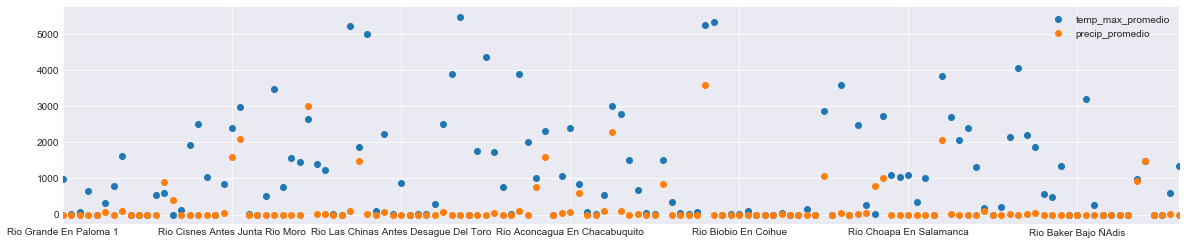

In [8]:
df_nan.plot(marker = 'o', figsize = (20, 4), ls = '')

Las datos corresponden a variables metereológicas muy hetereogeneos entre si, debido a la variabilidad en la latitud y altura. Los datos de distintas de distitnas estaciones son dificilmente comparables entre si, debido a la geografia de Chile. Las series de caudal, temperatura y precipitacion muestran estacionalidad, con minimos y maximos en marcadas temporadas del año. Las tres variables pueden ser representadas con una distribucion normal, pero en el caudal y la precipitacion existe una concentracion importante de valores en torno a cero. La cantidad de datos faltantes o nans varia entre las estaciones, como se muestra en el grafico anterior. Esto se debe al metodo con que se homogenizaron los datos y a la gran dificultad de contar con datos coincidentes, ya que muchas veces las estaciones son de dificil acceso y no existe personal suficiente para mantener el funcionamiento de estas como seria deseable.

# Parte 3

## 3.a

In [9]:
def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    ''' columna: caudal, precip_promedio o temp_max_promedio
        fecha_min: año inicial de la serie a graficar
        fecha_max: ultimo año de la serie a graficar (incluido)
        ***obs: no se agrega el dataframe con los datos como argumento ya que es el unico con que se trabajara***
    '''
    df_sub = df[df.gauge_id == codigo_estacion]
    df_sub = df_sub[(df_sub.index.year >= fecha_min) & (df_sub.index.year <= fecha_max)]
    print('La estacion codigo {} tien datos entre los años {} y {}'.format(codigo_estacion, min(df_sub.index.year), max(df_sub.index.year)))
    fig, ax = plt.subplots(figsize = (12,4))
    try:
        df_sub[columna].plot(ax = ax)
        ax.set_ylabel(columna)
        return ax
    except:
        print('Nombre de columna no es correcto!')    

La estacion codigo 10414001 tien datos entre los años 1995 y 2016
La estacion codigo 10414001 tien datos entre los años 1995 y 2016
La estacion codigo 10414001 tien datos entre los años 1995 y 2016


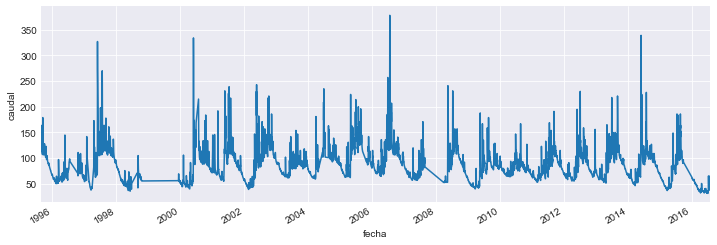

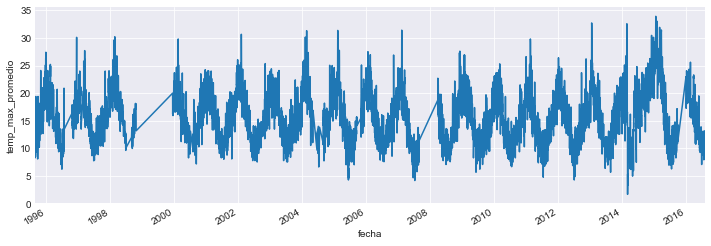

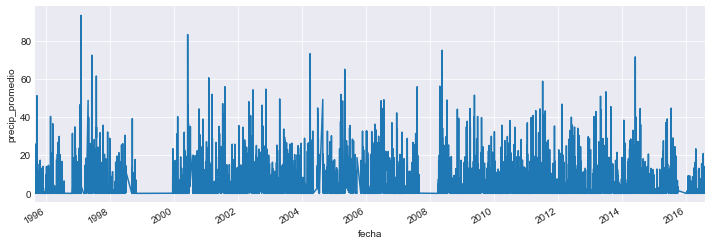

In [10]:
time_plot_una_estacion(df.gauge_id.unique()[1], 'caudal', 1960, 2100)
time_plot_una_estacion(df.gauge_id.unique()[1], 'temp_max_promedio', 1960, 2100)
time_plot_una_estacion(df.gauge_id.unique()[1], 'precip_promedio', 1960, 2100)

La estacion codigo 4711001 tien datos entre los años 1980 y 2010
La estacion codigo 4711001 tien datos entre los años 1980 y 2010
La estacion codigo 4711001 tien datos entre los años 1980 y 2010


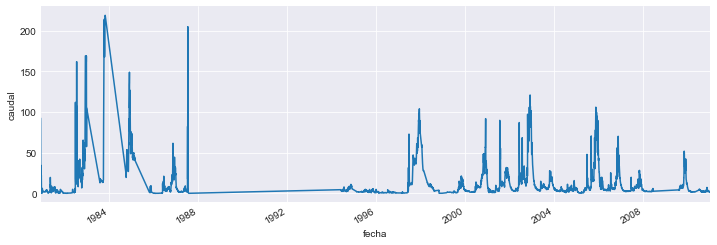

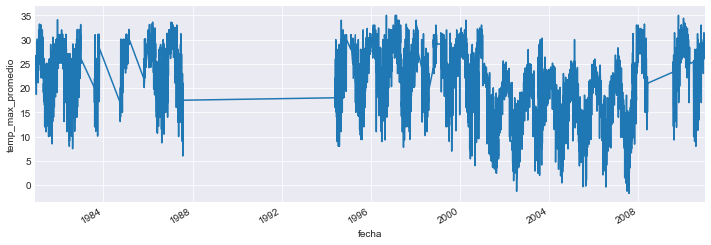

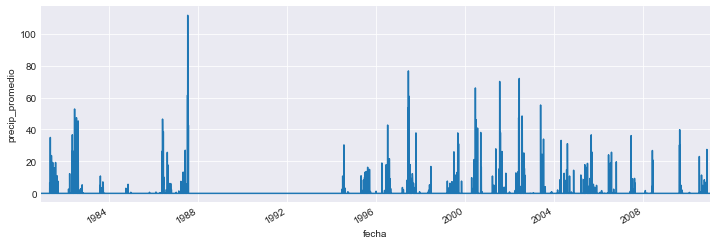

In [11]:
time_plot_una_estacion(df.gauge_id.unique()[100], 'caudal', 1980, 2010)
time_plot_una_estacion(df.gauge_id.unique()[100], 'temp_max_promedio', 1980, 2010)
time_plot_una_estacion(df.gauge_id.unique()[100], 'precip_promedio', 1980, 2010)

## 3.b

In [12]:
def norm_df(df, maxi = 1, mini = 0):
    ''' funcion para normalizar cada columna de un dataframe entre 0 y 1
    '''
    df2 = pd.DataFrame(index = df.index)
    for col in df.columns:
        vec = df[col].values
        df2[col] = (vec-np.nanmin(vec))/(np.nanmax(vec)-np.nanmin(vec))*(maxi-mini)+mini
    
    return df2

In [13]:
def time_plot_una_estacion_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    ''' columnas: lista de strings, pueden ser caudal, precip_promedio o temp_max_promedio
        fecha_min: año inicial de la serie a graficar
        fecha_max: ultimo año de la serie a graficar (incluido)
        ***obs: no se agrega el dataframe con los datos como argumento ya que es el unico con que se trabajara***
    '''   
    
    df_sub = df[df.gauge_id == codigo_estacion]
    df_sub = df_sub.loc[:, columnas]
    
    df_sub_norm = norm_df(df_sub)
    df_sub_norm = df_sub_norm[(df_sub.index.year >= fecha_min) & (df_sub.index.year <= fecha_max)]

    print('La estacion codigo {} tien datos entre los años {} y {}'.format(codigo_estacion, min(df_sub.index.year), max(df_sub.index.year)))
    fig, ax = plt.subplots(figsize = (12,4))
    df_sub_norm.plot(ax = ax, alpha = 0.6)
    ax.legend(columnas, frameon = True)
    return ax

La estacion codigo 4711001 tien datos entre los años 1960 y 2018


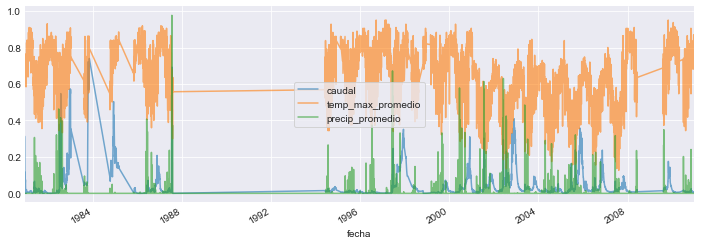

In [14]:
time_plot_una_estacion_varias_columnas(df.gauge_id.unique()[100], ['caudal', 'temp_max_promedio', 'precip_promedio'], 1980, 2010)

La estacion codigo 4711001 tien datos entre los años 1960 y 2018


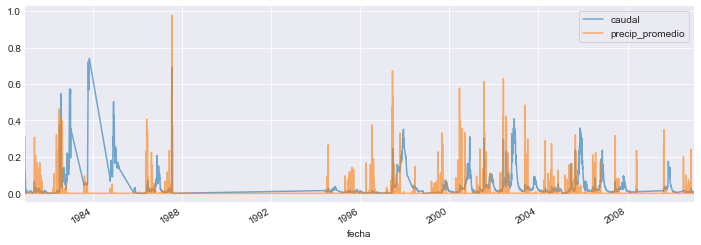

In [15]:
time_plot_una_estacion_varias_columnas(df.gauge_id.unique()[100], ['caudal', 'precip_promedio'], 1980, 2010)

La estacion codigo 5221002 tien datos entre los años 1979 y 2016


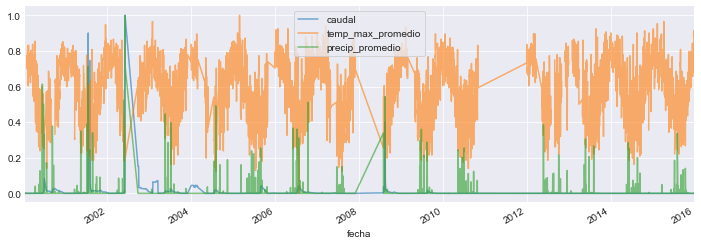

In [16]:
time_plot_una_estacion_varias_columnas(df.gauge_id.unique()[122], ['caudal', 'temp_max_promedio', 'precip_promedio'], 2000, 2015)

Obs: existe una clara correlacion entre los minimos de temperatura y el aumento de la precipitacion

# Parte 4

Por simplicidad se consideraran las sgtes estaciones:<br>
Verano: ene-feb-mar<br>
Otoño: abr-may-jun<br>
Invierno: jul-ago-sep<br>
Primavera: oct-nov-dic

## Calculo valores umbral

In [17]:
list0 = []
for igauge, gauge in tqdm(enumerate(df.gauge_name.unique())):
    df_sub0 = df[df.gauge_name == gauge]
    list1 = []
    for iest, est in enumerate([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]):
        dummy = [x for x in df_sub0.index if x.month in est]
        df_sub1 = df_sub0.loc[dummy, ['caudal', 'precip_promedio', 'temp_max_promedio']]
        max_vals = df_sub1.quantile(0.95).values
        list1.extend(list(max_vals))
    list0.append(list1)

In [18]:
df_max = pd.DataFrame(index = df.gauge_name.unique(), columns = [x+'_'+y for x in ['V', 'O', 'I', 'P'] for y in ['caudal', 'precip', 'temp']], data = list0)
df_max.head()

,V_caudal,V_precip,V_temp,O_caudal,O_precip,O_temp,I_caudal,I_precip,I_temp,P_caudal,P_precip,P_temp
Rio Grande En Paloma 1,18.025,0.000000,30.975000,11.915,2.253409,28.188000,26.13,5.928030,27.200001,74.66,0.000000,30.500
Rio Maullin En Las Quemas,89.235,18.270000,25.750000,144.000,27.575000,19.200001,167.00,21.963333,17.770000,125.00,17.739167,23.270
Rio Palena Bajo Junta Rosselot,1493.100,20.361500,29.100000,2219.850,32.298999,17.965001,2012.25,28.295000,15.249667,1860.05,23.655833,25.876
Rio Cachapoal En Puente Arqueado (Ca),167.000,0.077094,32.599998,222.700,19.683333,25.680001,262.00,15.183928,22.207000,142.00,1.628125,30.565
Rio Baker En Desague Lago Bertrand,829.000,6.147000,28.210001,803.800,11.206667,17.845000,641.80,8.184000,14.835000,649.00,7.362000,24.740


## Definicion variables extremas

In [19]:
df['caudal_extremo'] = 0
df['precip_extremo'] = 0
df['temp_extremo'] = 0
df2 = pd.DataFrame()
for igauge, gauge in tqdm(enumerate(df.gauge_name.unique())):
    df_sub0 = df[df.gauge_name == gauge]
    for iest, est in enumerate([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]):
        dummy = [x for x in df_sub0.index if x.month in est]
        for icol, col in enumerate(['caudal', 'precip_promedio', 'temp_max_promedio']):
            df_sub1 = df_sub0.loc[dummy, col].to_frame()
            per95 = df_max.iloc[igauge, 3*iest+icol]
            index_ext = df_sub1[df_sub1[col] > per95].index
            df_sub0.loc[index_ext, df.columns[-3+icol]] = [1]*len(index_ext)
    df2 = df2.append(df_sub0)

c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Creo que el percentil 95 es un parametro razonable para definir un evento extremo para las variables analizadas. Además del analisis realizado, propondria estudiar maximos seleccionados a partir del metodo POT (peak over threshold) con un umbral de la media mas 1 o 2 veces la desviacion estandar. Ademas, solo seleccionaria maximos distanciados temporalmente en 2 o mas dias, para asi estudiar la duracion de un evento extremo.

# Parte 5

In [20]:
list0 = []
for igauge, gauge in tqdm(enumerate(df2.gauge_name.unique())):
    df_sub0 = df2[df2.gauge_name == gauge]
    list1 = []
    for iest, est in enumerate([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]):
        dummy = [x for x in df_sub0.index if x.month in est]
        for var in ['caudal_extremo', 'precip_extremo', 'temp_extremo']:
            df_sub1 = df_sub0.loc[dummy, var].to_frame()
            list1.append(len(df_sub1[df_sub1[var] > 0])/len(df_sub1)*100)
    list0.append(list1)

In [21]:
df_n = pd.DataFrame(index = df.gauge_id.unique(), columns = [x+'_'+y for x in ['V', 'O', 'I', 'P'] for y in ['caudal', 'precip', 'temp']], data = list0)
df_n.head()

,V_caudal,V_precip,V_temp,O_caudal,O_precip,O_temp,I_caudal,I_precip,I_temp,P_caudal,P_precip,P_temp
4540001,5.045278,0.905563,4.139715,5.007474,5.007474,4.334828,5.018182,5.018182,3.927273,5.035971,2.354480,4.054938
10414001,5.017710,5.017710,4.958678,4.910456,5.025997,4.910456,4.761905,5.015873,5.015873,4.761905,5.019305,5.019305
11040001,5.019305,5.019305,4.826255,5.059920,5.059920,4.926764,5.043050,5.043050,4.981550,5.057618,5.057618,4.993598
6019003,4.935459,5.011390,3.872437,5.049732,5.049732,4.361132,4.952830,5.031447,4.402516,4.967949,5.048077,4.487179
11530000,4.937362,5.011054,5.011054,5.054945,5.054945,5.054945,5.026257,5.026257,5.026257,4.966140,5.041384,5.041384


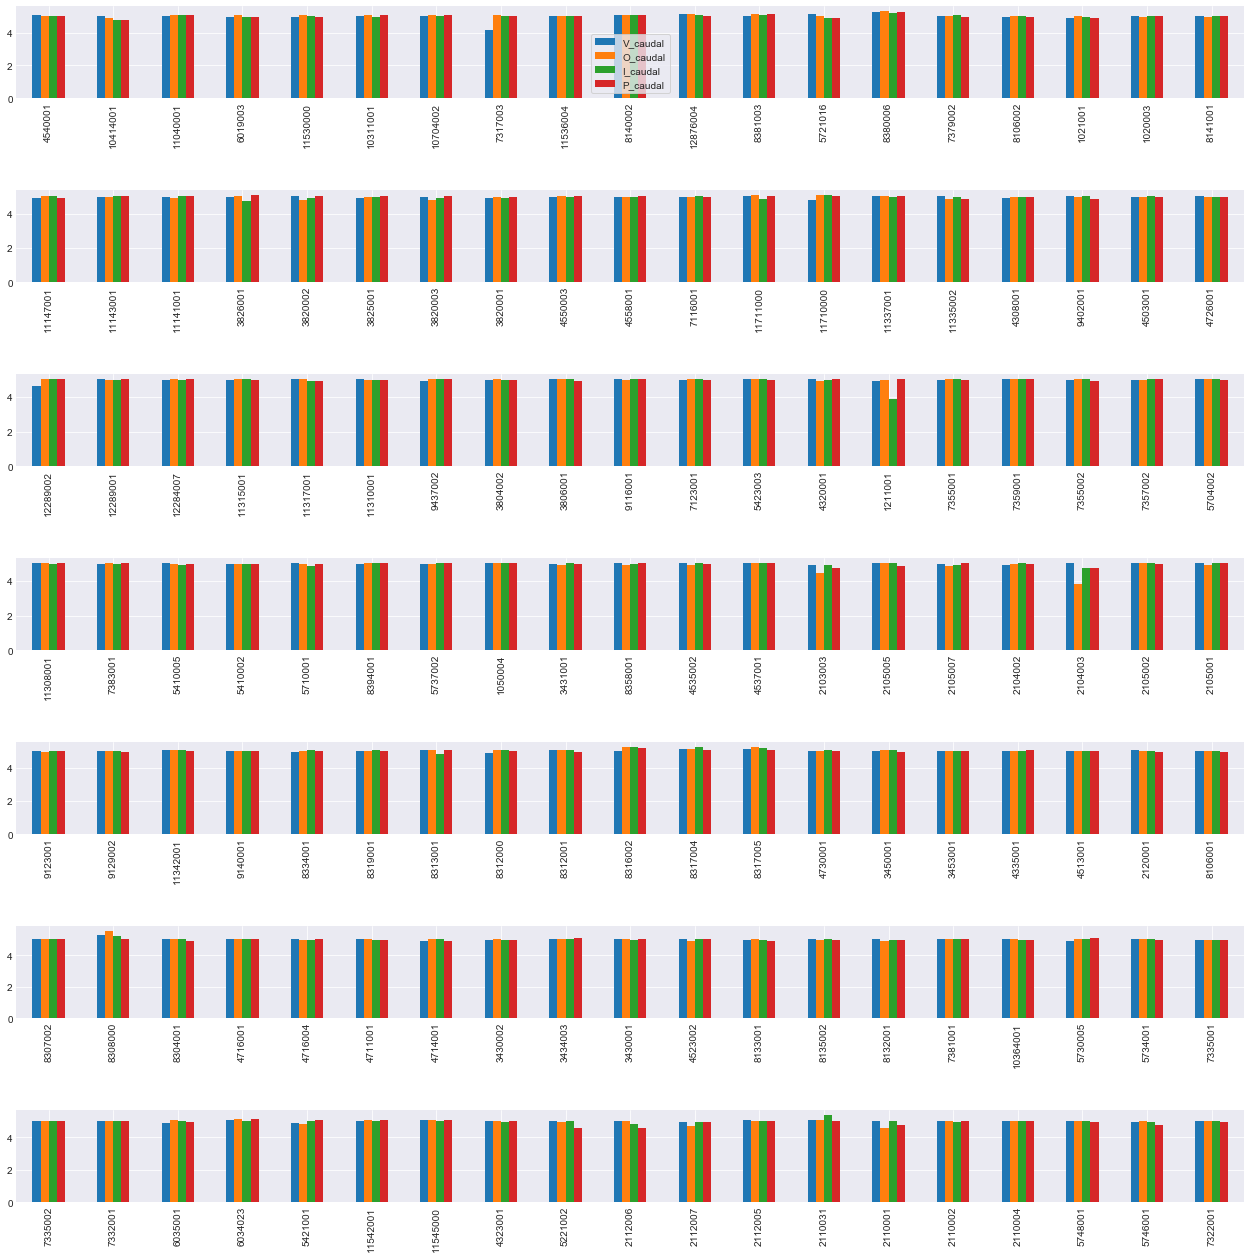

In [22]:
df_n_q = df_n.loc[:, [x for x in df_n.columns if 'caudal' in x]]
fig, ax = plt.subplots(nrows = 7, figsize = (22, 22))
aux = [int(133*x/7) for x in range(7)] + [133]
for i in range(len(aux)-1): 
    df_n_q.iloc[aux[i]:aux[i+1],:].plot.bar(ax = ax[i], label=None)
    ax[i].legend([])
fig.subplots_adjust(hspace=1)
ax[0].legend(df_n_q.columns, frameon = True)

El comportamiento de la variable caudal_extremo es similar en las diferentes cuencas ya que el umbral se difinio de tal modo que en promedios e sobrepase el 5% del tiempo. Vale mas la pena analizar el comportamiento del umbral (percentil 95) en cada cuenca para determinar en que epoca del año se tiene mayor caudal, ya que los aportes pueden ser por deshielo (verano y primavera) o por lluvias (otoño e invierno)

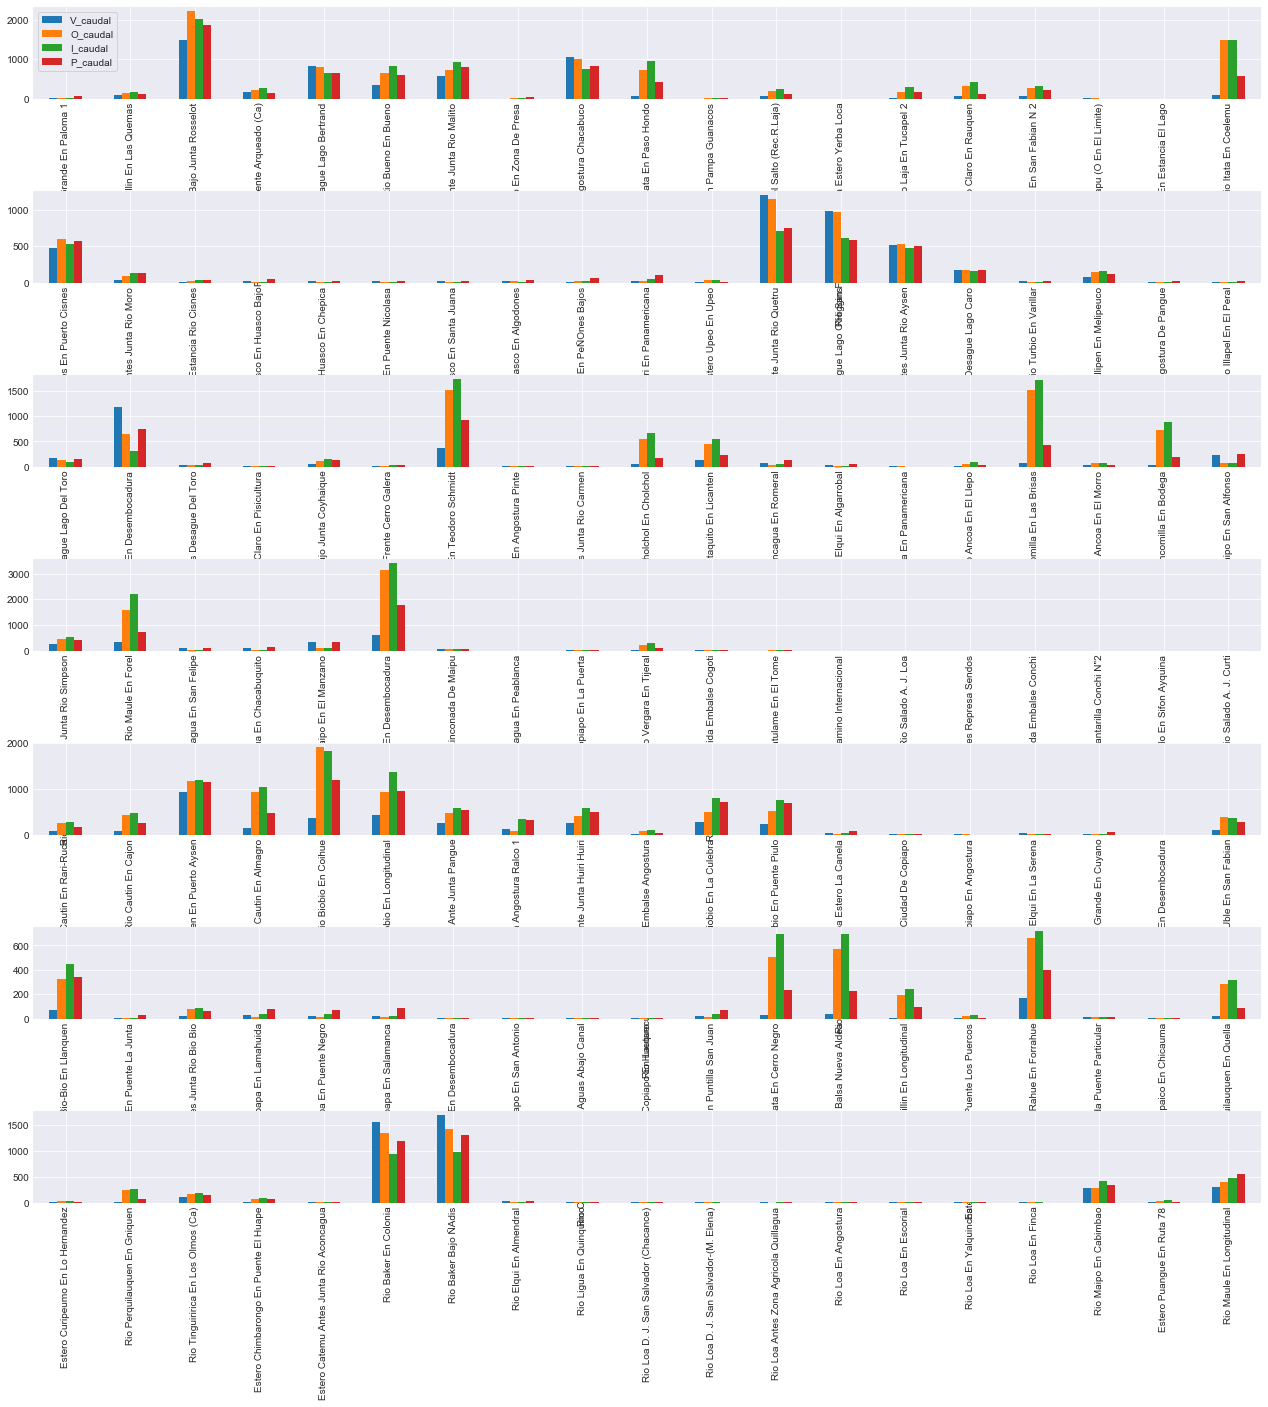

In [23]:
df_n_q = df_max.loc[:, [x for x in df_max.columns if 'caudal' in x]]
fig, ax = plt.subplots(nrows = 7, figsize = (22, 22))
aux = [int(133*x/7) for x in range(7)] + [133]
for i in range(len(aux)-1): 
    df_n_q.iloc[aux[i]:aux[i+1],:].plot.bar(ax = ax[i], label=None)
    ax[i].legend([])
fig.subplots_adjust(hspace=1)
ax[0].legend(df_n_q.columns, frameon = True)

En este grafico se aprecia una gran diferencia entre las diferentes cuencas, la cual debe estar explicada principalmente por la latitud y altura de la estacion.

# Parte 6

In [24]:
years = df2.index.year.unique()
aux = []
for year in years:
    dummy = df2[df2.index.year == year]
    aux.append(len(dummy[dummy.caudal_extremo > 0])/len(dummy)*100)
df_years = pd.DataFrame({'n': aux}, index = years)
df_years = df_years.sort_index()

Text(0, 0.5, '% eventos sobre umbral')

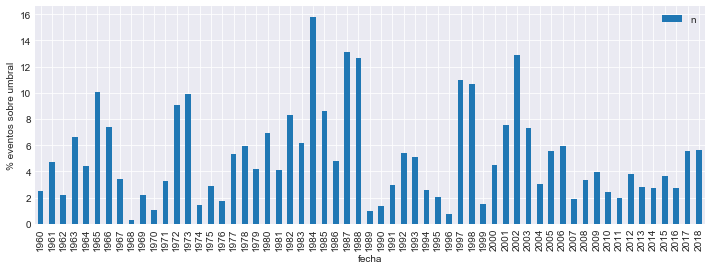

In [25]:
fig, ax = plt.subplots(figsize = (12,4))
df_years.plot.bar(ax = ax)
ax.set_ylabel('% eventos sobre umbral')

Text(0.5, 0, 'Año')

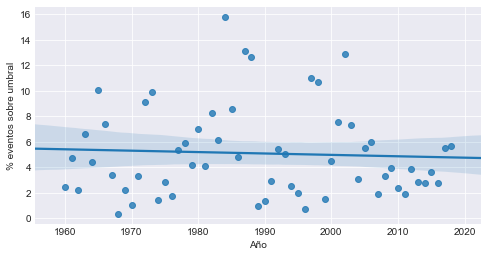

In [26]:
fig, ax = plt.subplots(figsize = (8,4))
sns.regplot(df_years.index.values, df_years.n, ax = ax)
ax.set_ylabel('% eventos sobre umbral')
ax.set_xlabel('Año')

El grafico muestra una disminucion leve del porcentaje de eventos sobre umbral a lo largo de los años. No se aprecia una clara relacion, hay que ser cautos a la hora de concluir.

# Parte 7

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [28]:
## se usara mes como variable explicativa
df2['mes'] = [x.month for x in df2.index]

In [29]:
#df2 = df2.drop(['estacion'], axis = 1)

## Un modelo por cuenca

Al desarrollar un modelo de prediccion por cuenca, las variables relevantes son solo el mes, temperatura, precipitacion y el caudal, ya que todas las observaciones se encuentran a la misma latitud, altura, etc.

c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array wa

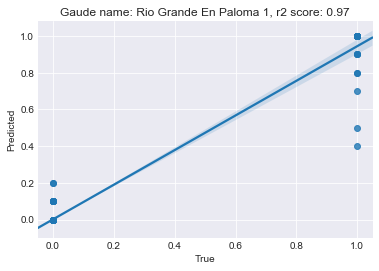

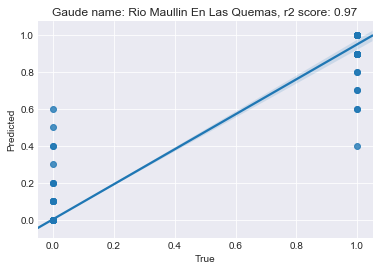

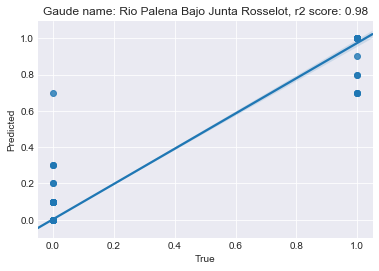

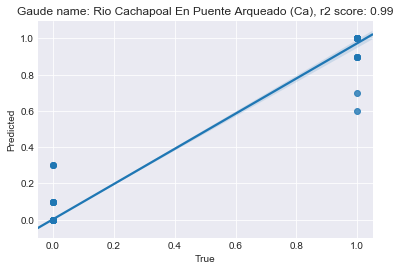

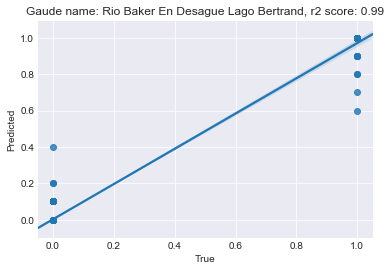

In [30]:
## Prediccion datos simultaneos
for i in range(5):
    df_ml = df2[df2.gauge_id == df2.gauge_id.unique()[i]]
    df_ml = df_ml.dropna(axis = 0)
    X = df_ml.loc[:, ['caudal', 'precip_promedio', 'temp_max_promedio', 'mes']]
    Y = df_ml.loc[:, 'caudal_extremo'].to_frame()
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2)
    model = ExtraTreesRegressor(random_state=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    df_pred = pd.DataFrame(index = x_test.index, columns = Y.columns, data = y_pred)
    df_obs = Y.loc[df_pred.index, df_pred.columns]
    r2 = r2_score(df_obs.iloc[:, 0], df_pred.iloc[:, 0])
    fig, ax = plt.subplots()
    sns.regplot(df_obs['caudal_extremo'].values, df_pred['caudal_extremo'].values, ax = ax)
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    ax.set_title('Gaude name: {}, r2 score: {:.2f}'.format(df2.gauge_name.unique()[i], r2))

El algoritmo presenta un buen desempeño para las cuencas analisadas

c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector 

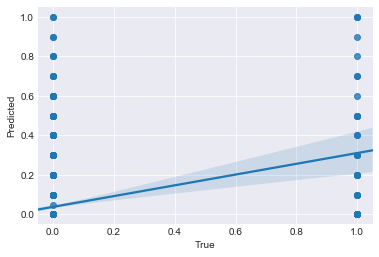

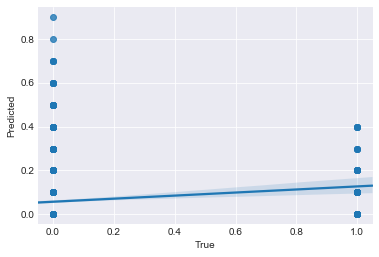

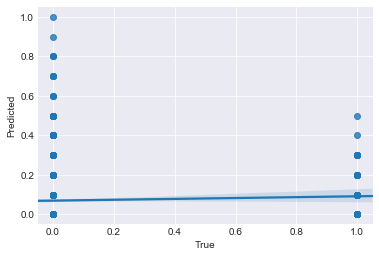

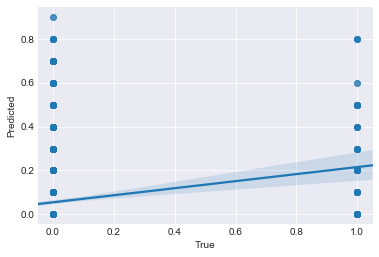

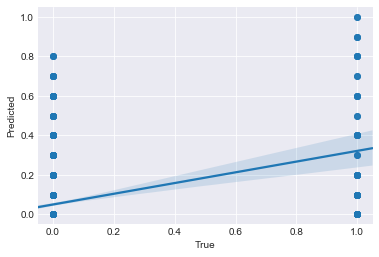

In [31]:
## prediccion datos 1 paso de tiempo al futuro
for i in range(5):
    df_ml = df2[df2.gauge_id == df2.gauge_id.unique()[i]]
    df_ml = df_ml.dropna(axis = 0)
    X = df_ml.loc[:, ['caudal', 'precip_promedio', 'temp_max_promedio', 'mes']]
    X = X.iloc[:-1,:]
    Y = df_ml.loc[:, 'caudal_extremo'].to_frame()
    Y = Y.iloc[1:, :]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2)
    model = ExtraTreesRegressor(random_state=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    df_pred = pd.DataFrame(index = x_test.index, columns = Y.columns, data = y_pred)#.dropna(axis = 0)
    df_obs = Y.loc[df_pred.index, df_pred.columns]#.dropna(axis = 0)
    #r2 = r2_score(df_obs.iloc[:, 0], df_pred.iloc[:, 0])
    fig, ax = plt.subplots()
    sns.regplot(df_obs['caudal_extremo'].values, df_pred['caudal_extremo'].values, ax = ax)
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    #ax.set_title('Gaude name: {}, r2 score: {:.2f}'.format(df2.gauge_name.unique()[i], r2))

Al predecir datos de un paso de tiempo adelante, el desempeño del modelo de prediccion decrece de manera conciderable

## Modelo global

In [32]:
df2.columns

Index(['codigo_estacion', 'institucion', 'fuente', 'nombre', 'altura',
       'latitud', 'longitud', 'codigo_cuenca', 'nombre_sub_cuenca',
       'cantidad_observaciones', 'caudal', 'gauge_id', 'gauge_name',
       'precip_promedio', 'temp_max_promedio', 'caudal_extremo',
       'precip_extremo', 'temp_extremo', 'mes'],
      dtype='object')

c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\Users\tcuevas\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Text(0.5, 1.0, 'All gauges, r2 score: 0.98')

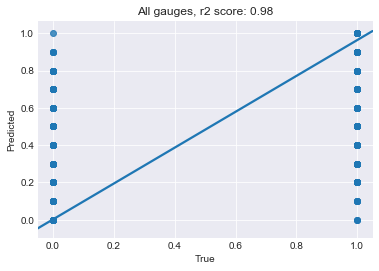

In [33]:
df_ml = df2
df_ml = df_ml.dropna(axis = 0)
df_ml.index = range(len(df_ml.index))
X = df_ml.loc[:, ['caudal', 'precip_promedio', 'temp_max_promedio', 'altura', 'latitud', 'longitud', 'mes']]
Y = df_ml.loc[:, 'caudal_extremo'].to_frame()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2)
model = ExtraTreesRegressor(random_state=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
df_pred = pd.DataFrame(index = x_test.index, columns = Y.columns, data = y_pred)
df_obs = Y.loc[df_pred.index, df_pred.columns]
r2 = r2_score(df_obs.iloc[:, 0], df_pred.iloc[:, 0])
fig, ax = plt.subplots()
sns.regplot(df_obs['caudal_extremo'].values, df_pred['caudal_extremo'].values, ax = ax)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
ax.set_title('All gauges, r2 score: {:.2f}'.format(r2))

La precision del modelo de baja al utilizar datos del dia anterior para predecir, considero que es valido usar los datos del mismo dia ya que corresponden a datos promedios.

# Parte 8

## 8.1

El modelo tiene un buen desempeño al predecir los datos del mismo dia, se utilizo el coeficiente de determinacion ($r^2$) para medir la performance. Las variables mas importantes son el caudal, temperatura, preciptacion y mes. El modelo desarrollado es una herramienta util, pero los datos con que se alimento pueden haber sido generados a partir de una metodologia muy simplista.